In [1]:
import os, sys
project_root_dir = os.path.join(os.getcwd(),'../..')
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)

from matplotlib import pyplot as plt
import numpy as np
import torch
import config

from HySpecLab.metrics import rmse, sad

In [2]:
from dataset import Samson
dataset = Samson(config.Samson_PATH)

result_path = os.path.join(config.RESULTS_PATH, 'samson/egu-net/result')
X_true = dataset.A@dataset.endmembers()

In [3]:
dataset.n_col

95

# Endmember Estimation

In [4]:
M_est = np.load(os.path.join(result_path, 'M_Estimation.npy'))

sad_result_vca = sad(torch.tensor(M_est, dtype=torch.float32), dataset.endmembers())

In [5]:
print(sad_result_vca, np.diagonal(sad_result_vca.numpy()).mean())

sad_result = np.diagonal(sad_result_vca.numpy()).mean()
sad_result

tensor([[0.0454, 0.3203, 0.8139],
        [0.3475, 0.0400, 1.0760],
        [0.5323, 0.8364, 0.2522]]) 0.112556


0.112556

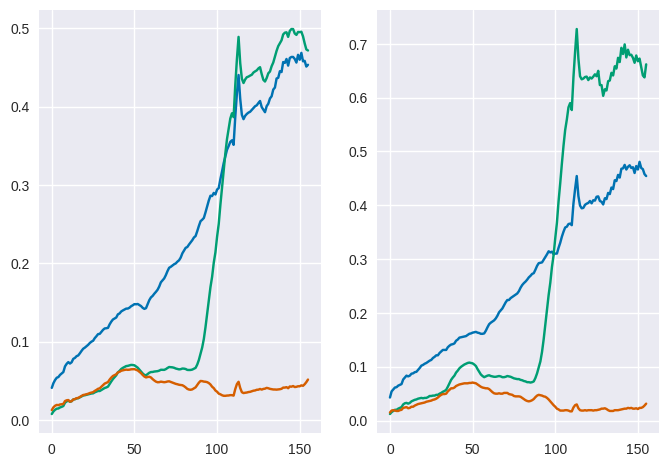

In [7]:
with plt.style.context('seaborn-colorblind'):
    plt.subplot(1,2,1)
    plt.plot(M_est.T)
    plt.subplot(1,2,2)
    plt.plot(dataset.endmembers().T)
    plt.show()


# Reconstruction

In [8]:
rmse_Y = np.zeros(10)
for i in range(10):
    Y_est = torch.tensor(np.load(os.path.join(result_path, 'Y_Estimation/{}.npy'.format(i))), dtype=torch.float32)
    rmse_Y[i] = rmse(X_true, Y_est, dim=None).numpy()

print(rmse_Y.mean(), rmse_Y.std())

0.10245791226625442 0.001278257933826094


# Abundance Estimation

In [9]:
rmse_A = np.zeros(10)
for i in range(10):
    A_est = torch.tensor(np.load(os.path.join(result_path, 'A_Estimation/{}.npy'.format(i))), dtype=torch.float32)
    rmse_A[i] = rmse(dataset.A, A_est, dim=None).numpy()

print(rmse_A.mean(), rmse_A.std())

0.19687784910202027 0.0011261640861663902


# Save Results

In [10]:
import pandas as pd 

df = pd.DataFrame({'RMSE_X':rmse_Y.mean(), 'RMSE_X_std':rmse_Y.std(), 'RMSE_A':rmse_A.mean(), 'RMSE_A_std':rmse_A.std(), 'SAD_M':sad_result}, index=[0])
df.to_csv(os.path.join(result_path, 'metrics.csv'), index=False)

In [11]:
df

,RMSE_X,RMSE_X_std,RMSE_A,RMSE_A_std,SAD_M
0,0.102458,0.001278,0.196878,0.001126,0.112556


# Images

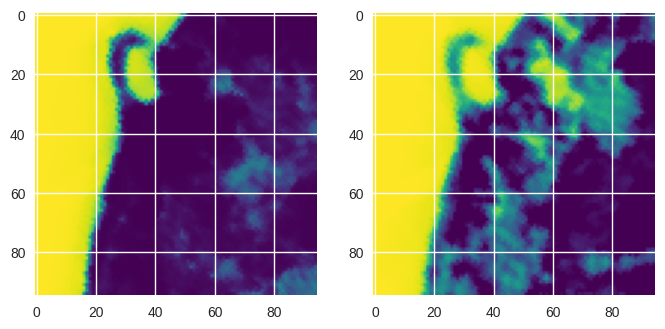

In [13]:
# plt.imshow(dataset.A.numpy().reshape(dataset.n_col, dataset.n_row, -1, order='F'), cmap='jet')
plt.subplot(1, 2, 1)
plt.imshow(A_est.numpy().reshape(dataset.n_col, dataset.n_row, -1, order='C')[..., 2], cmap='viridis')
plt.subplot(1, 2, 2)
plt.imshow(dataset.A.numpy().reshape(dataset.n_col, dataset.n_row, -1, order='C')[..., 2], cmap='viridis')
plt.show()